In [0]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
from functools import reduce

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
 
plt.style.use('seaborn-deep')
pd.options.display.float_format = "{:,.2f}".format

In [2]:
from google.colab import files
upload = files.upload()

Saving AMD.csv to AMD.csv


In [0]:
stock_price =  pd.read_csv('AMD.csv',parse_dates=['Date'])

In [5]:
stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 7 columns):
Date         1008 non-null datetime64[ns]
Open         1008 non-null float64
High         1008 non-null float64
Low          1008 non-null float64
Close        1008 non-null float64
Adj Close    1008 non-null float64
Volume       1008 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 55.2 KB


In [6]:
stock_price.describe()

,Open,High,Low,Close,Adj Close,Volume
count,"1,008.00","1,008.00","1,008.00","1,008.00","1,008.00","1,008.00"
mean,15.72,16.06,15.37,15.72,15.72,"61,216,172.13"
std,9.73,9.92,9.54,9.74,9.74,"41,329,745.19"
min,1.81,1.90,1.75,1.80,1.80,"5,591,100.00"
25%,9.67,9.93,9.48,9.60,9.60,"35,305,850.00"
50%,13.02,13.22,12.74,13.00,13.00,"51,771,850.00"
75%,23.23,23.65,22.76,23.25,23.25,"78,094,725.00"
max,42.35,42.94,41.06,42.59,42.59,"325,058,400.00"


In [0]:
stock_price = stock_price[['Date','Adj Close']]

In [8]:
stock_price.columns = ['ds', 'y']
stock_price.head(10)

,ds,y
0,2015-12-14,2.34
1,2015-12-15,2.36
2,2015-12-16,2.54
3,2015-12-17,2.56
4,2015-12-18,2.45
5,2015-12-21,2.53
6,2015-12-22,2.77
7,2015-12-23,2.83
8,2015-12-24,2.92
9,2015-12-28,3.00


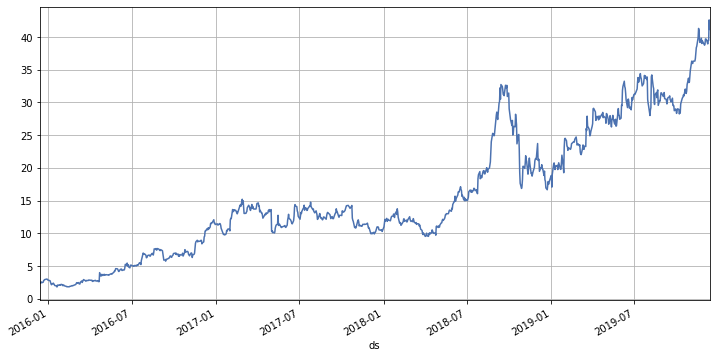

In [9]:
stock_price.set_index('ds').y.plot(figsize=(12,6), grid=True);

In [10]:
model = Prophet()
model.fit(stock_price)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [11]:
future = model.make_future_dataframe(365, freq='d')

future_boolean = future['ds'].map(lambda x : True if x.weekday() in range(0, 5) else False)
future = future[future_boolean] 

future.tail()

,ds
1367,2020-12-07
1368,2020-12-08
1369,2020-12-09
1370,2020-12-10
1371,2020-12-11


In [0]:
forecast = model.predict(future)

In [13]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1263,2020-12-07,52.80,43.01,62.22,44.02,62.29,-0.22,-0.22,-0.22,-0.17,-0.17,-0.17,-0.05,-0.05,-0.05,0.00,0.00,0.00,52.58
1264,2020-12-08,52.85,43.53,62.29,44.03,62.38,-0.24,-0.24,-0.24,-0.13,-0.13,-0.13,-0.11,-0.11,-0.11,0.00,0.00,0.00,52.61
1265,2020-12-09,52.89,43.09,62.56,44.03,62.46,-0.32,-0.32,-0.32,-0.16,-0.16,-0.16,-0.16,-0.16,-0.16,0.00,0.00,0.00,52.56
1266,2020-12-10,52.93,43.08,62.81,44.04,62.55,-0.40,-0.40,-0.40,-0.17,-0.17,-0.17,-0.22,-0.22,-0.22,0.00,0.00,0.00,52.54
1267,2020-12-11,52.98,43.19,62.77,44.05,62.62,-0.49,-0.49,-0.49,-0.21,-0.21,-0.21,-0.28,-0.28,-0.28,0.00,0.00,0.00,52.48


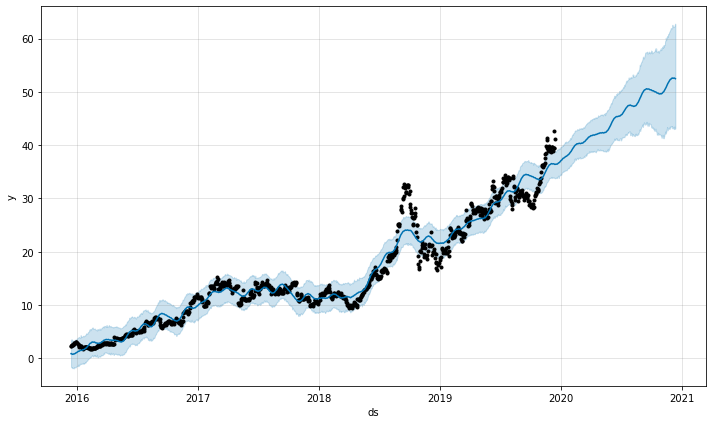

In [14]:
model.plot(forecast);